In [38]:
import pandas as pd
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

In [10]:
for dirpath, dirnames, filenames in os.walk('./data/birds-450'):
    print(f'There ar {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There ar 4 directories and 3 images in ./data/birds-450
There ar 0 directories and 5 images in ./data/birds-450\images to test
There ar 450 directories and 0 images in ./data/birds-450\test
There ar 0 directories and 5 images in ./data/birds-450\test\ABBOTTS BABBLER
There ar 0 directories and 5 images in ./data/birds-450\test\ABBOTTS BOOBY
There ar 0 directories and 5 images in ./data/birds-450\test\ABYSSINIAN GROUND HORNBILL
There ar 0 directories and 5 images in ./data/birds-450\test\AFRICAN CROWNED CRANE
There ar 0 directories and 5 images in ./data/birds-450\test\AFRICAN EMERALD CUCKOO
There ar 0 directories and 5 images in ./data/birds-450\test\AFRICAN FIREFINCH
There ar 0 directories and 5 images in ./data/birds-450\test\AFRICAN OYSTER CATCHER
There ar 0 directories and 5 images in ./data/birds-450\test\AFRICAN PIED HORNBILL
There ar 0 directories and 5 images in ./data/birds-450\test\ALBATROSS
There ar 0 directories and 5 images in ./data/birds-450\test\ALBERTS TOWHEE
There ar 0

There ar 0 directories and 5 images in ./data/birds-450\test\WHITE CHEEKED TURACO
There ar 0 directories and 5 images in ./data/birds-450\test\WHITE CRESTED HORNBILL
There ar 0 directories and 5 images in ./data/birds-450\test\WHITE NECKED RAVEN
There ar 0 directories and 5 images in ./data/birds-450\test\WHITE TAILED TROPIC
There ar 0 directories and 5 images in ./data/birds-450\test\WHITE THROATED BEE EATER
There ar 0 directories and 5 images in ./data/birds-450\test\WILD TURKEY
There ar 0 directories and 5 images in ./data/birds-450\test\WILSONS BIRD OF PARADISE
There ar 0 directories and 5 images in ./data/birds-450\test\WOOD DUCK
There ar 0 directories and 5 images in ./data/birds-450\test\YELLOW BELLIED FLOWERPECKER
There ar 0 directories and 5 images in ./data/birds-450\test\YELLOW CACIQUE
There ar 0 directories and 5 images in ./data/birds-450\test\YELLOW HEADED BLACKBIRD
There ar 450 directories and 0 images in ./data/birds-450\train
There ar 0 directories and 166 images in ./

There ar 0 directories and 158 images in ./data/birds-450\train\JAPANESE ROBIN
There ar 0 directories and 164 images in ./data/birds-450\train\JAVA SPARROW
There ar 0 directories and 163 images in ./data/birds-450\train\JOCOTOCO ANTPITTA
There ar 0 directories and 144 images in ./data/birds-450\train\KAGU
There ar 0 directories and 154 images in ./data/birds-450\train\KAKAPO
There ar 0 directories and 175 images in ./data/birds-450\train\KILLDEAR
There ar 0 directories and 170 images in ./data/birds-450\train\KING EIDER
There ar 0 directories and 136 images in ./data/birds-450\train\KING VULTURE
There ar 0 directories and 138 images in ./data/birds-450\train\KIWI
There ar 0 directories and 143 images in ./data/birds-450\train\KOOKABURRA
There ar 0 directories and 160 images in ./data/birds-450\train\LARK BUNTING
There ar 0 directories and 157 images in ./data/birds-450\train\LAZULI BUNTING
There ar 0 directories and 154 images in ./data/birds-450\train\LESSER ADJUTANT
There ar 0 direct

There ar 0 directories and 5 images in ./data/birds-450\valid\CROWNED PIGEON
There ar 0 directories and 5 images in ./data/birds-450\valid\CUBAN TODY
There ar 0 directories and 5 images in ./data/birds-450\valid\CUBAN TROGON
There ar 0 directories and 5 images in ./data/birds-450\valid\CURL CRESTED ARACURI
There ar 0 directories and 5 images in ./data/birds-450\valid\D-ARNAUDS BARBET
There ar 0 directories and 5 images in ./data/birds-450\valid\DALMATIAN PELICAN
There ar 0 directories and 5 images in ./data/birds-450\valid\DARJEELING WOODPECKER
There ar 0 directories and 5 images in ./data/birds-450\valid\DARK EYED JUNCO
There ar 0 directories and 5 images in ./data/birds-450\valid\DARWINS FLYCATCHER
There ar 0 directories and 5 images in ./data/birds-450\valid\DAURIAN REDSTART
There ar 0 directories and 5 images in ./data/birds-450\valid\DEMOISELLE CRANE
There ar 0 directories and 5 images in ./data/birds-450\valid\DOUBLE BARRED FINCH
There ar 0 directories and 5 images in ./data/bird

In [11]:
num_of_bird_groups = len(os.listdir('./data/birds-450/train'))
num_of_bird_groups

450

In [21]:
data_dir = pathlib.Path('./data/birds-450/train')

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'ALBATROSS'
 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT'
 'AZARAS SPINETAIL' 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER'
 'AZURE TIT' 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL'
 'BAN

In [27]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read image and plotting it
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    
    print(f'Image shape: {img.shape}')
    
    return img

Image shape: (224, 224, 3)


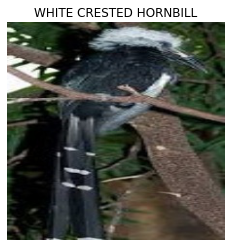

In [37]:
img = view_random_image('./data/birds-450/train/', 'WHITE CRESTED HORNBILL')

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


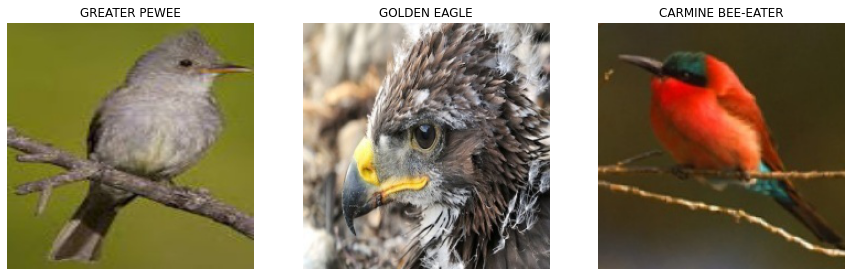

In [42]:
plt.figure(figsize = (15, 7))
plt.subplot(1, 3, 1)
img_1 = view_random_image('./data/birds-450/train/', 'GREATER PEWEE')

plt.subplot(1, 3, 2)
img_2 = view_random_image('./data/birds-450/train/', 'GOLDEN EAGLE')

plt.subplot(1, 3, 3)
img_3 = view_random_image('./data/birds-450/train/', 'CARMINE BEE-EATER')

## Data Preprocessing

In [74]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import Sequential

In [46]:
train_dir = './data/birds-450/train/'
test_dir = './data/birds-450/test/'
val_dir = './data/birds-450/valid/'

#### Data Augmentation
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbSTr1n%2FbtrfVroTxVc%2F8kac1Sac8oMHDp6bI45RK1%2Fimg.jpg' width = 500 >

ImageDataGenerator - Data Loading과 Preprocessing 단계를 한 번에 수행
* rescale: 1./255 
    * 원본은 0-255의 RGB 계수로 구성되는데, 이 값은 모델을 효과적으로 학습시키기에 너무 높음. 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환
* rotation_range: 이미지 회전 범위
* shear_range: 임의 전단 범위 
* zoom_range: 임의 확대/축소 범위
* horizontal_flip: 50% 확률로 이미지를 수평으로 뒤집는다. 뒤집어도 자연스러울 때 사용하면 효과적
* vertical_flip: 50% 확률로 이미지를 수직으로 뒤집는다. 뒤집어도 자연스러울 때 사용하면 효과적

x shape: (1, 224, 224, 3)


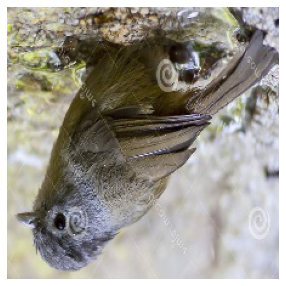

In [89]:
def show_image(image):
    plt.figure(figsize = (5, 5))
    plt.imshow(image)
    plt.axis('off')

img = load_img('./data/birds-450/train/ABBOTTS BABBLER/001.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
print(f'x shape: {x.shape}')
train_datagen.fit(x)
data_gen_iter = train_datagen.flow(x)

aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)
aug_image = aug_image.astype('int')
show_image(aug_image)

In [93]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 30,
                                  shear_range = 2.0,
                                  zoom_range = 0.4,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagne = ImageDataGenerator(rescale = 1./255)

In [94]:
# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                              target_size = (224, 224), 
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                              target_size = (224, 224), 
                                              class_mode = 'categorical')

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                              target_size = (224, 224), 
                                              class_mode = 'categorical')

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


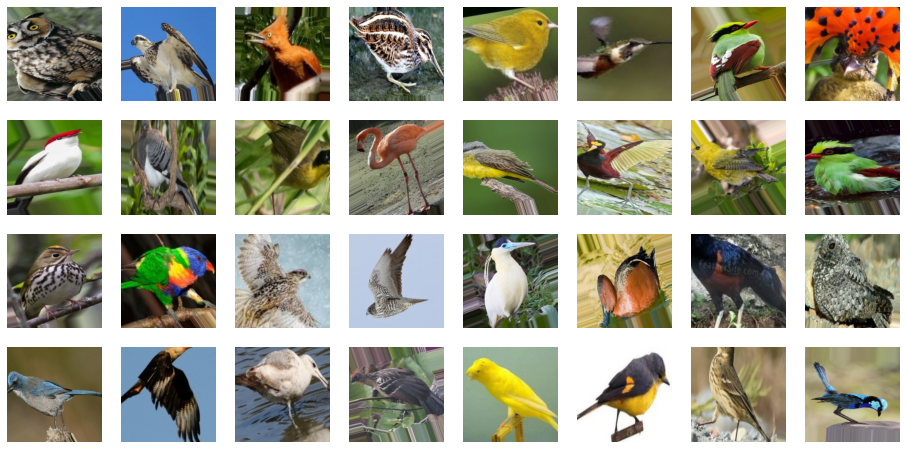

In [96]:
augs = train_data.__getitem__(0)

plt.figure(figsize = (16, 8))
for i, img in enumerate(augs[0]):
    plt.subplot(4, 8, i + 1)
    plt.axis('off')
    plt.imshow(img.squeeze())

## Creating and fitting the Model

In [55]:
# Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top = False, )

# Freeze the base model 
base_model.trainable = False

# Create inputs into models 
inputs = tf.keras.layers.Input(shape = (300, 300, 3), name = 'input-layer')

# Pass the inputs
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

# Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = 'softmax', name = 'output-layer')(x)

# Combine the inputs with outputs into a model 
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['accuracy'])

history = model_0.fit(train_data,
                     epochs = 10,
                     steps_per_epoch = len(train_data),
                     validation_data = val_data,
                     validation_steps = int(0.25 * len(val_data)), )

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
1607/2208 [====================>.........] - ETA: 19:00 - loss: 9.8435 - accuracy: 0.4556

KeyboardInterrupt: 

In [ ]:
model_0.summary()